In [13]:
import matplotlib.pyplot as plt


In [1]:
from tensorflow.keras.layers import Input, Dense, Add, Activation
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import random

In [2]:
from tensorflow import keras

In [7]:
print(tf.version.VERSION)

2.7.0


In [43]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [44]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

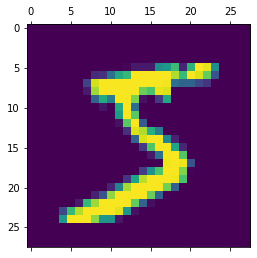

In [45]:
plt.matshow(x_train[0])

In [60]:
from tensorflow.keras import layers as la

In [139]:
x = np.array([[10000,1000,100,10,1,0.1,0.01,0.001],[0,0,0,0,0,0,0,0]])
stddev = np.array([[1,2,3,4,5,6,7,8],[8,7,6,5,4,3,2,1]])

In [ ]:
class NoiseAugLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs, noise_aug_fn, noise_level):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        self.noise_aug_fn = noise_aug_fn
        self.noise_level = noise_level

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]),
                                         self.num_outputs])

    def call(self, inputs, stddev):
        noise = np.random.rand(0,
        return tf.matmul(inputs, self.kernel)

In [140]:
m0 = tf.keras.Sequential([
    la.GaussianNoise(1, seed=42)  
])
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.model.layers[0].stddev = x
        print('updating sttdev in training')
        print(self.model.layers[0].stddev)
cc = MyCustomCallback()
m0.compile('adam','mse')
m0.fit(tf.constant([[1.0]]), tf.constant([[1.0]]), callbacks=[cc])
# m0(x, training=True, callbacks=[])

updating sttdev in training
[[1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]]
1/1 [==============================] - 0s 106ms/step - loss: 761448.5000


In [141]:
y = np.zeros((1000,2,8))

In [142]:
tf.math.reduce_mean(m0(y, training=1), axis=0)- 1

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[40.77018  ,  3.9669242,  1.8556659, -1.397187 , -1.0115175,
        -1.0044372, -1.0003504, -1.0000002],
       [-1.       , -1.       , -1.       , -1.       , -1.       ,
        -1.       , -1.       , -1.       ]], dtype=float32)>

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_epoch_begin(self, epoch, logs=None):
        self.model.layers[2].stddev = random.uniform(0, 1)
        print('updating sttdev in training')
        print(self.model.layers[2].stddev)


X_train = np.zeros((10,100))
y_train = np.zeros((10,10))

noise_change = MyCustomCallback()
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=5, 
          callbacks = [noise_change])

In [58]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.GaussianNoise(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [59]:
# inputs = Input(shape=100)
# # bn0 = BatchNormalization(axis=1, scale=True)(inputs)
# g0 = GaussianNoise(0.5)(bn0) 
# d0 = Dense(10)(g0)
# model = Model(inputs, d0)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_epoch_begin(self, epoch, logs=None):
        self.model.layers[2].stddev = random.uniform(0, 1)
        print('updating sttdev in training')
        print(self.model.layers[2].stddev)

In [50]:
model.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9862
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9892
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0348 - sparse_categorical_accuracy: 0.9905
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9915
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0279 - sparse_categorical_accuracy: 0.9925


In [51]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 848us/step - loss: 0.0647 - sparse_categorical_accuracy: 0.9798


In [54]:
model.layers[2].stddev

AttributeError: 'Dense' object has no attribute 'stddev'

In [24]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_epoch_begin(self, epoch, logs=None):
        self.model.layers[2].stddev = random.uniform(0, 1)
        print('updating sttdev in training')
        print(self.model.layers[2].stddev)


X_train = np.zeros((10,100))
y_train = np.zeros((10,10))

noise_change = MyCustomCallback()
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=5, 
          callbacks = [noise_change])

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10
Make sure all arrays contain the same number of samples.